<title>Decoding</title>

In [12]:
%load_ext tikzmagic
from scipy.stats import multivariate_normal

In [2]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

<h1>CHI 2017 Tutorial on Computational Interaction Design: Probabilistic Decoding for Intelligent Text Entry</h1>

<p><a href="http://pokristensson.com">Per Ola Kristensson</a>, Department of Engineering, University of Cambridge, UK.</p>
<p>Copyright (c) 2017 Per Ola Kristensson. All rights reserved.</p>

<p>
In this part of the tutorial we will explore <em>statistical decoding</em> as a technique for designing intelligent interactive systems.
</p>

<h2>Introduction</h2>

<p>
An intelligent text entry method is a text entry method that <em>infers</em> users' intended text. We have known how to design such methods for quite some time. One of the more interesting examples is a 12th century shorthand system called <em>Nova ars notaria</em> ("the new note art") by the monk of John of Tilbury. What is interesting with this system is that the <em>design principles</em> are known:
</p>
<ol>
<li>Simplify letters to line marks.</li>
<li>Compress common word stems into sequences of simple line marks and dots.</li>
<li>Identify common word stems by frequency analysis 
</ol>
<p>
In other words, two fundamental principles underpin the design of any efficient text entry method:
</p>
<ol>
<li>Minimise users' effort in articulating their input.</li>
<li>Exploit the redundancies in natural languages using statistical language modelling.</li>
</ol>
<p>
However, <em>how</em> can we both minimise users' articulation effort and leverage the redundancies in natural languages? The solution is to perform <em>statistical decoding</em>. A statistical decoder is a generative probabilistic model that is capable of searching a vast hypothesis space in order to identify users' intended text given noisy observations.
</p>

<h2>Statistical Decoding</h2>

<p>
The problem we are adressing is a user attempting to communciate information over some form of channel. In Human-Computer Interaction (HCI) we typically model a user transmitting <em>information</em> to a computer system.
</p>

The term <em>information</em> in HCI usually refers to characters (for example, typing on a keyboard), words (using speech recognition), commands (for instance by using keyboard shortcuts or touchscreen gestures).

<p>
More formally, we intend to transmit a message $y$ via some form of signal $x$. In a perfect world this would be trivially achieved via a lookup-table. Unfortunately we live in an imperfect world and as a consequence our signal will be perturbed by noise in our neuromuscular system, device sensor imprecision, cognitive errors by the user, etc. Due to this inherent uncertainty it makes sense to model the problem <em>probabilistically</em>.
</p>

We then wish to compute the probability of the message $y$ <em>given</em> the signal $x$. This can be written mathematically as $P(y | x)$.

<p>
The probability $P(y|x)$ is known as a <em>conditional probability</em> and it is (by either the definition of conditional probability or as an axiom of probability):
</p>

\begin{equation}
P(y|x) = \frac{P(x \cap y)}{P(x)}
\end{equation}

<p>
(We are going to assume $P(x)\neq0$ and $P(y)\neq 0$).
</p>
<p>
The above equation states that the conditional probability of $y$ given $x$ is identical to the ratio of the <em>joint probability</em> of $x$ and $y$ and the probability of $x$. The joint probability of $x$ and $y$ can also be written as $P(x,y)$. 
</p>

<p>
We can rewrite the conditional probability $P(y|x)$ as follows:
</p>

\begin{align}
P(y|x) &= \frac{P(x \cap y)}{P(x)}\\
P(x|y) &= \frac{P(y \cap x)}{P(y)} = \frac{P(x \cap y)}{P(y)}\\
\Rightarrow P(x \cap y) &= P(x|y)P(y) = P(y|x)P(x)\\
\Rightarrow P(y|x) &= \frac{P(x|y)P(y)}{P(x)}\\
\end{align}

<p>
This last expression is known as <em>Bayes' rule</em> (or theorem). Usually we have many possible messages that we wish to decode and $P(y|x)$ will then become the <em>posterior</em> probability distribution, assigning a probability to every possible message. Our objective is to compute this posterior probability distribution and select the most probable message.
</p>

<p>
Now, since we are usually only interested in the most probable message $\hat{y}$ we can write:
</p>

\begin{equation}
\hat{y}=\underset{y}{\arg\max}\left[P(y|x)\right]
\end{equation}

<p>
We have already seen that the conditional probability $P(y|x)$ can be written using Bayes' rule:
</p>

\begin{equation}
\hat{y}=\underset{y}{\arg\max}\left[\frac{P(x|y)P(y)}{P(x)}\right]
\end{equation}

<p>
However, as we are only interested in the message that maximises the conditional probability of the message given the signal, the denominator $P(x)$ will be invariant and can therefore be dropped:
</p>

\begin{equation}
\hat{y}=\underset{y}{\arg\max}\left[P(x|y)P(y)\right]
\end{equation}

<p>
$P(x|y)$ is the <em>likelihood</em> of the signal $x$ given a particular hypothesis for what the message $y$ could be. $P(y)$ is the <em>prior</em> probability of the message, that is, without taking any signal into account. For instance, if a system can only recognise two messages, $x_1$ and $x_2$, and both are equally likely in the absence of any additional information, then the prior probability of either $x_1$ or $x_2$ is $0.5$.
</p>

<p>
Identifying the highest probable message $y$ is a <em>search problem</em>. We search by consulting a model of the likelihood of a signal $x$ given a message $y$ under consideration and by consulting a model of the prior probability of a message $y$ without any consideration to any signal. This search will generate <em>hypotheses</em> and these hypotheses will have probabilities assigned to them. Usually, the hypothesis with the highest probability assigned to it is our preferred hypothesis:
</p>

\begin{equation}
\hat{\text{hypothesis}}=\underset{\text{hypotheses}}{\arg\max}\left(\text{likelihood model}\cdot\text{prior model}\right)
\end{equation}

<h2>Sequence Decoding</h2>

<p>
Let us assume we have a simple touchscreen keyboard which can generate $k$ distinct letters $L=\left\{l_1, l_2, \ldots, l_k\right\}$.
</p>

We view our signal as a discrete <em>observation sequence</em>, which, for ease of notation, we will denote $O$. When a user is typing on the touchscreen keyboard we are provided with a touch point coordinate $(x,y)$, where $x$ and $y$ are the horizontal and vertical components of the touch point respectively. A set of $n$ touch points then form $n$ observations:

\begin{equation}
O = \left\{o^{(1)}, o^{(2)}, \ldots, o^{(n)}\right\}
\end{equation}

Since subscripts are often used to denote specific members of a set, we use a superscript within parantheses to denote the index of an individual observation in an sequence (indexing starts at 1). This means that for instance the sequence $l_1, l_2$ means two letters selected from the set of letters that can be generated by the keyboard (which, since we have defined the keyboard above to generate distinct letters, means $l_1 \neq l_2$). In contrast, $l_1^{(1)},l_1^{(2)}$ means we have generated the <em>same</em> letter $l_1$ twice. Similarly, $l_1^{(1)},l_2^{(2)}$ means we have generated the letter sequence $l_1, l_2$.

We are now given a set of observations $O = \left\{o^{(1)}, o^{(2)}, \ldots, o^{(n)}\right\}$ and we wish to find a <em>hypothesis</em> for $O$, which is a corresponding letter sequence ${L} = \left\{l^{(1)}, l^{(2)}, \ldots, l^{(m)}\right\}$. Note that the cardinality of $O$ and $L$ are not necessarily identical, that is, it is not neccesarily true that $n = m$ ($|O|=|L|$). There are obviously many possible letter sequences that can match the observation sequence. However, we are only interested in the most <em>probable</em> letter sequence $\hat{L}$, and this can be computed using the expression we derived earlier:

\begin{equation}
\hat{L}=\underset{L}{\arg\max}\left[P(O|L)P(L)\right]
\end{equation}

<p>
$P(L)$ is the prior. What would be a suitable model for the prior probability of a letter sequence? This particular problem is known as <em>statistical language modelling</em> and it is a research area that has received considerable attention. A very simple model is the unigram probability model, which in this case simply assigns a probability to each individual letter $l_i$. The probabilities assigned over the letters $l_1, l_2, \ldots, l_k$ (remember that our keyboard could generate $k$ distinct letters) then must sum to one and this is our prior probability distribution.</p>

$P(O|L)$ is the likelihood of the observation sequence given a particular letter sequence hypothesis. For a touchscreen keyboard this means that we need a model that assigns a probability to an individual $(x,y)$ touch point given a particular letter key hypothesis, that is $P(o_i|l_i)$. A simple way to achieve this is to centre a two-dimensional Gaussian distribution at each key centre and assume each 2D Gaussian has equal variance and that there is no correlation between the horizontal and vertical axes (that is, the covariance matrix is diagonal). To compute our likelihood distribution we need to compute the probability of observing a specific touch point for all possible $k$ letters that can be generated by the keyboard. For example, if our keyboard has two keys, say $A$ and $B$ generating the letters $a$ and $b$ respectively, then our likelihood distribution would need to be computed by computing the probability of the touch point for key $A$ and key $B$. If the touch point is centred at key $A$ the probability will be maximised for $A$ and smaller for $B$ (we assume keys do not overlap spatially).

<p>
The search for the most probable letter sequence given an observation sequence can be modelled as a (discrete-time) <em>Markov chain</em>. A Markov chain assumes a future state is conditional on the previously known state and independent of any other previous or future states.
</p>

<h2>Statistical Decoding using Token Passing</h2>

<p>
We will now explain how to statistically decode the observation sequence $O$ into the most probable letter sequence $L$. There are several algorithms for learning a hidden Markov model and performing inference. For our particular decoding problem a flexible and efficient method is known as <em>token passing</em>. A particular advantage is that it can efficiently search more complex models and it can be easily parallelised.
</p>

<h3>Token</h3>

<p>
Fundamel to token passing is the notion of a <em>token</em>. A token is a data structure that at a minimum contains the following information: 1) the hypothesis generated so far; and 2) the accumulated probability of the hypothesis. For a touchscreen keyboard the hypothesis generated so far is a letter sequence (a string). For bookkeeping reasons we will also let each token store which observation index it belongs to.
</p>

In [2]:
class Token:
    def __init__(self, hypo, acc_prob, obs_index):
        self.hypo = hypo
        self.acc_prob = acc_prob
        self.obs_index = obs_index

<h3>Observation</h3>

<p>
An observation is simply an $(x,y)$ touch point.
</p>

In [3]:
class Observation:
    def __init__(self, x, y):
        self.x = x
        self.y = y

<h3>Observation Sequence</h3>

<p>
The observation sequence $O = \left\{o^{(1)}, o^{(2)}, \ldots, o^{(n)}\right\}$ is simply a series of observations. They could be kept in a list but it is often convenient to represent them as a separate class when we later improve the model's performance.
</p>

In [4]:
class ObservationSequence:
    def __init__(self, seq):
        self.seq = seq

<h3>Key</h3>

<p>
A key describes the geometry of the keyboard. In this case our likelihood model is very simple. All we need is information on where to centre the 2D Gaussian, which means we need the centre coordinate of the key, and the letter generated by the key. Below we have generated a simple keyboard layout with four keys: A, B, C and D.
</p>

In [5]:
class Key:
    def __init__(self, centre_x, centre_y, letter):
        self.centre_x = centre_x
        self.centre_y = centre_y
        self.letter = letter
                
a_key = Key(0.0,0.0,'a')
b_key = Key(0.0,1.0,'b')
c_key = Key(1.0,0.0,'c')
d_key = Key(1.0,1.0,'d')
keys = [a_key, b_key, c_key, d_key]

<h3>Prior</h3>

<p>
The prior is in this instance the simple unigram probability of the letter. It can be implemented using a simple hash table. To make the demonstration simple we will assume a unigram letter model and all of the letters will be equally probable.
</p>

In [6]:
lm = {'a':0.25,'b':0.25,'c':0.25,'d':0.25}
def get_prior(context, lm):
    c = context[-1]
    return lm[c]

<h3>Likelihood</h3>

<p>
The likelihood is a 2D Gaussian probability density function for the key corresponding to the letter under consideration, evaluated at the coordinate specified by the observation. To make the demonstration simple we will assume a symmetrical 2D Gaussian with unit variance.
</p>

In [7]:
def get_likelihood(x, y, key):
    key_x = key.centre_x
    key_y = key.centre_y
    p = multivariate_normal.pdf([x,y], mean=[key_x,key_y], cov=[[1,0],[0,1]]);
    return p

<h2>Substitution-Only Decoder</h2>

<p>
The first decoder we will look at is a <em>substitution-only</em> decoder. It takes as input:
</p>
<ul>
<li>A set of symbols that can be recognised.</li>
<li>A set of keys (a centre coordinate and a letter, the letter must correspond to a symbol in the symbol set).</li>
<li>A language model (in this case a simple mapping of a single letter to a probability).</li>
<li>An observation sequence.</li>
</ul>

<p>
Our decoder will receive a series of touch points, that is $O = \left\{o^{(1)}, o^{(2)}, \ldots, o^{(n)}\right\}$.
</p>

<p>
To be able to decode such a model we start with a single initial token. The process now works as follows. We take any token at observation index $i \in [0,n)$ and we propagate $k$ tokens to observation index $i+1$. We do this until we are at the last observation and can no longer propagate any tokens. These final tokens represent all hypotheses for the observation sequence. The token with the most probable hypothesis is the most likely letter sequence corresponding to the observation sequence.
</p>

The model of the substitution-only decoder is shown below. An initial start state leads to a state each for every observation. States are linked by edges. Each edge links two states and generates a symbol. A series of edges generate a <em>path</em>. As is evident in the figure, several paths are possible from the start state to the end state. The subsitution-only decoder below will search <em>all</em> such possible paths and substitute an observation for a symbol every time a particular edge is traversed when transitioning from one state to another.

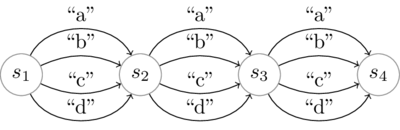

In [193]:
%%tikz
\tikzstyle{state}=[shape=circle,draw=black!50,fill=white!20]
\tikzstyle{observation}=[shape=rectangle,draw=black!50,fill=white!20]
\tikzstyle{lightedge}=[<-,dotted]
\tikzstyle{mainstate}=[state,thick]
\tikzstyle{mainedge}=[<-,thick]
\node[state] (s1) at (0,2) {$s_1$}
    ;
\node[state] (s2) at (2,2) {$s_2$}
    edge [<-,bend right=65] node[auto,swap] {``a''} (s1)
    edge [<-,bend right=25] node[auto,swap] {``b''} (s1)
    edge [<-,bend left=25] node[auto,swap] {``c''} (s1)
    edge [<-,bend left=65] node[auto,swap] {``d''} (s1)
    ;
\node[state] (s3) at (4,2) {$s_3$}
    edge [<-,bend right=65] node[auto,swap] {``a''} (s2)
    edge [<-,bend right=25] node[auto,swap] {``b''} (s2)
    edge [<-,bend left=25] node[auto,swap] {``c''} (s2)
    edge [<-,bend left=65] node[auto,swap] {``d''} (s2)
    ;
\node[state] (s4) at (6,2) {$s_4$}
    edge [<-,bend right=65] node[auto,swap] {``a''} (s3)
    edge [<-,bend right=25] node[auto,swap] {``b''} (s3)
    edge [<-,bend left=25] node[auto,swap] {``c''} (s3)
    edge [<-,bend left=65] node[auto,swap] {``d''} (s3)
    ;

<p>
The code below provides several possible observation sequences. The default observation sequence is empty and generates the expected result that the decoder predicts an empty hypothesis (no letter generated) given an empty observation sequence. By commenting and uncommenting the observation sequences it is possible to explore a few observation sequences:
</p>
<ul>
<li>No observations. This generates a single-state search space.</li>
<li>A noisy single touch in the vicinity of the A key. This generates a two-state search space.</li>
<li>Two noisy touches, both in the vicinity of the A key. This generates a three-state search space.</li>
<li>Two noisy touches near the B key followed by the A key. This generates a three-state search space.</li>
<li>Three noisy touches near the B key followed by the A key, followed by the D key. This generates a four-state search space (illustrated in the figure above).</li>
</ul>

In [29]:
symbols = ['a','b','c','d']
#obs_seq = ObservationSequence([]) #No observations
#obs_seq = ObservationSequence([Observation(0.1,0.1)]) #a + noise
#obs_seq = ObservationSequence([Observation(0.1,0.1),Observation(0.15,-0.1)]) #aa + noise
#obs_seq = ObservationSequence([Observation(0.1,1.1),Observation(0.15,-0.1)]) #ba + noise
obs_seq = ObservationSequence([Observation(0.1,1.1),Observation(0.15,-0.1),Observation(1.05,0.95)]) #bad + noise
completed_tokens = []

def get_key_for_symbol(symbol):
    for key in keys:
        if key.letter == symbol:
            return key
    return None

def propagate(token, obs_seq, completed_tokens):
    # Which observation is the token in?
    ix = token.obs_index
    # Are there more observations?
    next_ix = ix + 1
    if next_ix == len(obs_seq.seq):
        # No more observations, add token to the list of completed tokens
        completed_tokens.append(token)
    else:
        # There is another observation, propagage a token per symbol to the next observation
        next_obs = obs_seq.seq[next_ix]
        for symbol in symbols:
            # Find the key that generates the symbol
            key = get_key_for_symbol(symbol)
            # Calculate the prior probability of our symbol given previous symbols we have generated
            prior = get_prior(token.hypo+symbol, lm)
            # Calculate the likelihood of the observation (touch coordinate) given our current symbol hypothesis
            likelihood = get_likelihood(next_obs.x, next_obs.y, key)
            # Calculate an accumulated probability for our posterior probability
            acc_prob = token.acc_prob * prior * likelihood
            # Create a new token for the next observation index that contains the accumulated hypothesis and probability
            new_token = Token(token.hypo+symbol, acc_prob, next_ix)
            # Propagate our token
            propagate(new_token, obs_seq, completed_tokens)

# To start the process we need to create an initial token which we can then propagate to the first observation index
seed_token = Token("", 1.0, -1)
# Propagating the first token starts the search process
propagate(seed_token, obs_seq, completed_tokens)
# Sort the list of completed tokens according to the probabilities of their hypotheses
results = sorted(completed_tokens, key=lambda token: token.acc_prob, reverse=True)
for result in results:
    print(result.hypo, result.acc_prob)

bad 6.1206064355e-05
bcd 4.31311845695e-05
dad 4.10276518761e-05
bac 3.90267096827e-05
bab 3.53128272237e-05
bbd 3.35906003175e-05
aad 3.35906003175e-05
dcd 2.89116976262e-05
bcc 2.75016574943e-05
dac 2.61603858311e-05
bcb 2.48845287589e-05
bdd 2.36708959703e-05
acd 2.36708959703e-05
dab 2.36708959703e-05
baa 2.25164527512e-05
dbd 2.25164527512e-05
cad 2.25164527512e-05
bbc 2.14183123923e-05
aac 2.14183123923e-05
bbb 1.93800904838e-05
aab 1.93800904838e-05
abd 1.84349123176e-05
dcc 1.84349123176e-05
dcb 1.66805984632e-05
bca 1.58670760765e-05
ccd 1.58670760765e-05
ddd 1.58670760765e-05
daa 1.50932296447e-05
bdc 1.50932296447e-05
acc 1.50932296447e-05
dbc 1.43571241488e-05
cac 1.43571241488e-05
bdb 1.36569189416e-05
acb 1.36569189416e-05
add 1.29908631453e-05
dbb 1.29908631453e-05
cab 1.29908631453e-05
bba 1.23572912734e-05
aaa 1.23572912734e-05
cbd 1.23572912734e-05
abc 1.17546190664e-05
dca 1.0636019166e-05
abb 1.0636019166e-05
ccc 1.01172943903e-05
ddc 1.01172943903e-05
ccb 9.1545065

<h2>Decoding with Substitutions and Deletions</h2>

<p>
Our first decoder has some limitations. In particular, it cannot identify a hypothesis which contains more symbols than the number of observations. However, we can easily modify the decoder to handle both substitutions and deletions of observations. We do this by modifying our <em>propagate</em> function so that instead of generating $k$ transitions ($k$ tokens), each transition modelling a substituion of an observation with a letter, we generate $k+1$ transitions ($k+1$ tokens). The additional transition (token) models an $\epsilon$-transition (see figure below).
</p>

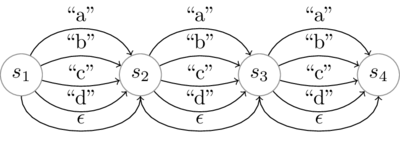

In [209]:
%%tikz
\tikzstyle{state}=[shape=circle,draw=black!50,fill=white!20]
\tikzstyle{observation}=[shape=rectangle,draw=black!50,fill=white!20]
\tikzstyle{lightedge}=[<-,dotted]
\tikzstyle{mainstate}=[state,thick]
\tikzstyle{mainedge}=[<-,thick]
\node[state] (s1) at (0,2) {$s_1$}
    ;
\node[state] (s2) at (2,2) {$s_2$}
    edge [<-,bend right=65] node[auto,swap] {``a''} (s1)
    edge [<-,bend right=25] node[auto,swap] {``b''} (s1)
    edge [<-,bend left=15] node[auto,swap] {``c''} (s1)
    edge [<-,bend left=50] node[auto,swap] {``d''} (s1)
    edge [<-,bend left=90] node[auto,swap] {$\epsilon$} (s1)
    ;
\node[state] (s3) at (4,2) {$s_3$}
    edge [<-,bend right=65] node[auto,swap] {``a''} (s2)
    edge [<-,bend right=25] node[auto,swap] {``b''} (s2)
    edge [<-,bend left=15] node[auto,swap] {``c''} (s2)
    edge [<-,bend left=50] node[auto,swap] {``d''} (s2)
    edge [<-,bend left=90] node[auto,swap] {$\epsilon$} (s2)
    ;
\node[state] (s4) at (6,2) {$s_4$}
    edge [<-,bend right=65] node[auto,swap] {``a''} (s3)
    edge [<-,bend right=25] node[auto,swap] {``b''} (s3)
    edge [<-,bend left=15] node[auto,swap] {``c''} (s3)
    edge [<-,bend left=50] node[auto,swap] {``d''} (s3)
    edge [<-,bend left=90] node[auto,swap] {$\epsilon$} (s3)
    ;

In [32]:
symbols = ['a','b','c','d','ɛ'] #Epsilon represents a delete observation event (i.e. do not generate a hypothesis)
#obs_seq = ObservationSequence([]) #No observations
#obs_seq = ObservationSequence([Observation(0.1,1.1),Observation(0.15,-0.1),Observation(1.05,0.95)]) #bad + noise
obs_seq = ObservationSequence([Observation(0.1,1.1),Observation(0.15,-0.1),Observation(3.0,-2.7),Observation(1.05,0.95)]) #b - a - (Noisy input far away from any key) - d + noise
completed_tokens = []
deletion_penalty = 0.02

def get_key_for_symbol(symbol):
    for key in keys:
        if key.letter == symbol:
            return key
    return None

def propagate(token, obs_seq, completed_tokens):
    # Which observation is the token in?
    ix = token.obs_index
    # Are there more observations?
    next_ix = ix + 1
    if next_ix == len(obs_seq.seq):
        # No more observations, add token to the list of completed tokens
        completed_tokens.append(token)
    else:
        # There is another observation, propagage a token per symbol to the next observation
        next_obs = obs_seq.seq[next_ix]
        for symbol in symbols:
            if symbol == 'ɛ':
                # Delete observation
                acc_prob = token.acc_prob * deletion_penalty
                new_token = Token(token.hypo, acc_prob, next_ix)
                propagate(new_token, obs_seq, completed_tokens)
            else:
                # Substitute observation for symbol
                key = get_key_for_symbol(symbol)
                prior = get_prior(token.hypo+symbol, lm)
                likelihood = get_likelihood(next_obs.x, next_obs.y, key)
                acc_prob = token.acc_prob * prior * likelihood
                new_token = Token(token.hypo+symbol, acc_prob, next_ix)
                propagate(new_token, obs_seq, completed_tokens)

seed_token = Token("", 1.0, -1)
propagate(seed_token, obs_seq, completed_tokens)
results = sorted(completed_tokens, key=lambda token: token.acc_prob, reverse=True)
for result in results:
    print(result.hypo, result.acc_prob)

bad 1.2241212871e-06
bcd 8.6262369139e-07
dad 8.20553037522e-07
bac 7.80534193654e-07
bab 7.06256544475e-07
bbd 6.71812006351e-07
aad 6.71812006351e-07
bd 6.25390948031e-07
ad 6.21494443865e-07
ba 6.1685067145e-07
dcd 5.78233952524e-07
bcc 5.50033149886e-07
dac 5.23207716623e-07
bcb 4.97690575177e-07
bdd 4.73417919405e-07
acd 4.73417919405e-07
dab 4.73417919405e-07
baa 4.50329055024e-07
dbd 4.50329055024e-07
cad 4.50329055024e-07
cd 4.37959732418e-07
bc 4.34687321306e-07
bbc 4.28366247847e-07
aac 4.28366247847e-07
dd 4.19212089074e-07
da 4.13487370484e-07
bc 3.98766874234e-07
ac 3.96282353485e-07
bbb 3.87601809675e-07
aab 3.87601809675e-07
abd 3.68698246353e-07
dcc 3.68698246353e-07
bb 3.6081918888e-07
ab 3.5857110154e-07
ad 3.43221829387e-07
bd 3.41083382561e-07
bb 3.38534826224e-07
aa 3.38534826224e-07
dcb 3.33611969264e-07
d 3.17515105358e-07
bca 3.1734152153e-07
ccd 3.1734152153e-07
ddd 3.1734152153e-07
b 3.15142649897e-07
a 3.13179150662e-07
bdc 3.01864592895e-07
daa 3.01864592895

<p>
We can now see that the decoder is able to ignore noisy observations. For instance, for the observation sequence modelling letter keys: B, A, (noise), D, the decoder is able to delete the noisy observation. If we had a more sophisticated language model, the decoder would now be able to correct misspellings and accidental touches on letter keys.
</p>

<h2>Beam Pruning</h2>

<p>
Our prior decoders will generate exponential growth in the number of tokens as a function of the number of observations. At observation index 1 we have propaged $k$ tokens, at observation index 2 we have propaged $k^2$ tokens, and so on.
</p>

<p>To keep the search complexity tractable we observe that many tokens that we are propagated are highly unlikely to contain the most probable hypotheses. These tokens can be filtered out using <em>beam pruning</em>. For every observation index we store the highest accumulated probability we have generated so far for that particular observation. We then impose a condition before we propagate a token: only propagate the token if the token's accumulated probability is within a certain distance to the highest accumulated probability for the next observation. This distance is known as the <em>beam width</em> and it is a parameter that can be used to set the operating point (or trade-off) between accuracy and time when searching for a hypothesis. The narrower the beam the more greedy the search becomes. This means decoding will be faster as less tokens are propagated. However, it also means there is a higher risk that a more probable hypothesis is never found as that particular path might have been eliminated at an early stage in the search.
</p>

In [34]:
class ObservationSequence:
    def __init__(self, seq):
        self.seq = seq
        self.beam = [0.0]*len(seq) 

symbols = ['a','b','c','d','ɛ'] #Epsilon represents a delete observation event (i.e. do not generate a hypothesis)
#obs_seq = ObservationSequence([]) #No observations
#obs_seq = ObservationSequence([Observation(0.1,1.1),Observation(0.15,-0.1),Observation(1.05,0.95)]) #bad + noise
obs_seq = ObservationSequence([Observation(0.1,1.1),Observation(0.15,-0.1),Observation(3.0,-2.7),Observation(1.05,0.95)]) #b - a - (Noisy input far away from any key) - d + noise
completed_tokens = []
deletion_penalty = 0.02
beam_width = 0.2

def get_key_for_symbol(symbol):
    for key in keys:
        if key.letter == symbol:
            return key
    return None

def beam_prune(p, obs_seq, obs_seq_index):
    bp = obs_seq.beam[obs_seq_index]
    if p > bp:
        obs_seq.beam[obs_seq_index] = p
        return False
    else:
        if p < beam_width * bp:
            return True
        else:
            return False

def propagate(token, obs_seq, completed_tokens):
    ix = token.obs_index
    next_ix = ix + 1
    if next_ix == len(obs_seq.seq):
        completed_tokens.append(token)
    else:
        next_obs = obs_seq.seq[next_ix]
        for symbol in symbols:
            if symbol == 'ɛ':
                acc_prob = token.acc_prob * deletion_penalty
                new_token = Token(token.hypo, acc_prob, next_ix)
                if not beam_prune(acc_prob, obs_seq, next_ix):
                    propagate(new_token, obs_seq, completed_tokens)
            else:
                key = get_key_for_symbol(symbol)
                prior = get_prior(token.hypo+symbol, lm)
                likelihood = get_likelihood(next_obs.x, next_obs.y, key)
                acc_prob = token.acc_prob * prior * likelihood
                new_token = Token(token.hypo+symbol, acc_prob, next_ix)
                if not beam_prune(acc_prob, obs_seq, next_ix):
                    propagate(new_token, obs_seq, completed_tokens)

seed_token = Token("", 1.0, -1)
propagate(seed_token, obs_seq, completed_tokens)
results = sorted(completed_tokens, key=lambda token: token.acc_prob, reverse=True)
for result in results:
    print(result.hypo, result.acc_prob)

bad 1.2241212871e-06
bcd 8.6262369139e-07
dad 8.20553037522e-07
bac 7.80534193654e-07
bab 7.06256544475e-07
bbd 6.71812006351e-07
aad 6.71812006351e-07
bd 6.25390948031e-07
ad 6.21494443865e-07
ba 6.1685067145e-07
dcd 5.78233952524e-07
bcc 5.50033149886e-07
dac 5.23207716623e-07
bcb 4.97690575177e-07
bdd 4.73417919405e-07
acd 4.73417919405e-07
dab 4.73417919405e-07
baa 4.50329055024e-07
dbd 4.50329055024e-07
cad 4.50329055024e-07
cd 4.37959732418e-07
bc 4.34687321306e-07
bbc 4.28366247847e-07
aac 4.28366247847e-07
dd 4.19212089074e-07
da 4.13487370484e-07
bc 3.98766874234e-07
ac 3.96282353485e-07
bbb 3.87601809675e-07
aab 3.87601809675e-07
abd 3.68698246353e-07
dcc 3.68698246353e-07
bb 3.6081918888e-07
ab 3.5857110154e-07
ad 3.43221829387e-07
bd 3.41083382561e-07
bb 3.38534826224e-07
aa 3.38534826224e-07
dcb 3.33611969264e-07
d 3.17515105358e-07
bca 3.1734152153e-07
ccd 3.1734152153e-07
ddd 3.1734152153e-07
b 3.15142649897e-07
a 3.13179150662e-07
bdc 3.01864592895e-07
daa 3.01864592895

<p>
We can see that the decoder generates less hypotheses as some hypotheses are eliminated in the search.
</p>

<h2>Decoding with Substitutions, Deletions and Insertions</h2>

Our latest decoder can substitute observations into either letters or empty strings ($\epsilon$-transitions). However, it cannot model the fact that a user may have accidentally failed to touch a letter key. To correct this behaviour we need to model <em>insertion</em> transitions. This can be done by adding <em>self-loops</em> to each state, see the figure below. Each self-loop can generate any symbol.

<p>
To model such insertions we modify our <em>propagate</em> function again. Instead of simply propagating $k+1$ tokens to observation index $i+1$, we also propagate $k$ tokens to observation index $i$, the observation index of the token under consideration.
</p>

<p>
Our search space is no longer increasing exponentially: it is infinite. The reason is that the decoding process can stay at observation index $i$ indefinately and keep generating new tokens. Therefore insertions need to carry an insertion probability. If the beam width and the insertion penalty are set correctly, the search becomes tractable again.
</p>

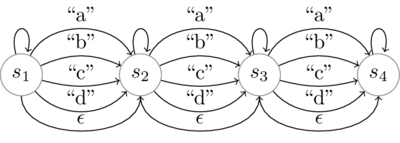

In [214]:
%%tikz
\tikzstyle{state}=[shape=circle,draw=black!50,fill=white!20]
\tikzstyle{observation}=[shape=rectangle,draw=black!50,fill=white!20]
\tikzstyle{lightedge}=[<-,dotted]
\tikzstyle{mainstate}=[state,thick]
\tikzstyle{mainedge}=[<-,thick]
\node[state] (s1) at (0,2) {$s_1$}
    edge [loop above] ();
    ;
\node[state] (s2) at (2,2) {$s_2$}
    edge [<-,bend right=65] node[auto,swap] {``a''} (s1)
    edge [<-,bend right=25] node[auto,swap] {``b''} (s1)
    edge [<-,bend left=15] node[auto,swap] {``c''} (s1)
    edge [<-,bend left=50] node[auto,swap] {``d''} (s1)
    edge [<-,bend left=90] node[auto,swap] {$\epsilon$} (s1)
    edge [loop above] ();
    ;
\node[state] (s3) at (4,2) {$s_3$}
    edge [<-,bend right=65] node[auto,swap] {``a''} (s2)
    edge [<-,bend right=25] node[auto,swap] {``b''} (s2)
    edge [<-,bend left=15] node[auto,swap] {``c''} (s2)
    edge [<-,bend left=50] node[auto,swap] {``d''} (s2)
    edge [<-,bend left=90] node[auto,swap] {$\epsilon$} (s2)
    edge [loop above] ();
    ;
\node[state] (s4) at (6,2) {$s_4$}
    edge [<-,bend right=65] node[auto,swap] {``a''} (s3)
    edge [<-,bend right=25] node[auto,swap] {``b''} (s3)
    edge [<-,bend left=15] node[auto,swap] {``c''} (s3)
    edge [<-,bend left=50] node[auto,swap] {``d''} (s3)
    edge [<-,bend left=90] node[auto,swap] {$\epsilon$} (s3)
    edge [loop above] ();
    ;

In [13]:
class ObservationSequence:
    def __init__(self, seq):
        self.seq = seq
        self.beam = [0.0]*len(seq) 

symbols = ['a','b','c','d','ɛ'] #Epsilon represents a delete observation event (i.e. do not generate a hypothesis)
#obs_seq = ObservationSequence([]) #No observations
#obs_seq = ObservationSequence([Observation(0.1,1.1),Observation(0.15,-0.1),Observation(1.05,0.95)]) #bad + noise
obs_seq = ObservationSequence([Observation(0.1,1.1),Observation(0.15,-0.1),Observation(3.0,-2.7),Observation(1.05,0.95)]) #b - a - (Noisy input far away from any key) - d + noise
completed_tokens = []
deletion_penalty = 0.02
insertion_penalty = 1.2
beam_width = 0.2

def get_key_for_symbol(symbol):
    for key in keys:
        if key.letter == symbol:
            return key
    return None

def beam_prune(p, obs_seq, obs_seq_index):
    bp = obs_seq.beam[obs_seq_index]
    if p > bp:
        obs_seq.beam[obs_seq_index] = p
        return False
    else:
        if p < beam_width * bp:
            return True
        else:
            return False

def propagate(token, obs_seq, completed_tokens):
    # Which observation is the token in?
    ix = token.obs_index
    # Are there more observations?
    next_ix = ix + 1
    if next_ix == len(obs_seq.seq):
        # No more observations, add token to the list of completed tokens
        completed_tokens.append(token)
    else:
        # There is another observation, propagage tokens for all symbols to the next observation index
        next_obs = obs_seq.seq[next_ix]
        for symbol in symbols:
            if symbol == 'ɛ':
                acc_prob = token.acc_prob * deletion_penalty
                new_token = Token(token.hypo, acc_prob, next_ix)
                if not beam_prune(acc_prob, obs_seq, next_ix):
                    propagate(new_token, obs_seq, completed_tokens)
            else:
                key = get_key_for_symbol(symbol)
                prior = get_prior(token.hypo+symbol, lm)
                likelihood = get_likelihood(next_obs.x, next_obs.y, key)
                acc_prob = token.acc_prob * prior * likelihood
                new_token = Token(token.hypo+symbol, acc_prob, next_ix)
                if not beam_prune(acc_prob, obs_seq, next_ix):
                    propagate(new_token, obs_seq, completed_tokens)
    # Propagate tokens for all symbols (except epsilon) within the same observation index
    if ix >= 0:
        for symbol in symbols:
            if not symbol == 'ɛ':
                key = get_key_for_symbol(symbol)
                prior = get_prior(token.hypo+symbol, lm)
                obs = obs_seq.seq[ix]
                acc_prob = token.acc_prob * prior * insertion_penalty
                new_token = Token(token.hypo+symbol, acc_prob, ix)
                if not beam_prune(acc_prob, obs_seq, ix):
                    propagate(new_token, obs_seq, completed_tokens)

seed_token = Token("", 1.0, -1)
propagate(seed_token, obs_seq, completed_tokens)
results = sorted(completed_tokens, key=lambda token: token.acc_prob, reverse=True)
for result in results:
    print(result.hypo, result.acc_prob)

bad 1.2241212871e-06
bcd 8.6262369139e-07
dad 8.20553037522e-07
bac 7.80534193654e-07
bab 7.06256544475e-07
bbd 6.71812006351e-07
aad 6.71812006351e-07
bd 6.25390948031e-07
ad 6.21494443865e-07
ba 6.1685067145e-07
dcd 5.78233952524e-07
bcc 5.50033149886e-07
dac 5.23207716623e-07
bcb 4.97690575177e-07
bdd 4.73417919405e-07
acd 4.73417919405e-07
dab 4.73417919405e-07
baa 4.50329055024e-07
dbd 4.50329055024e-07
cad 4.50329055024e-07
cd 4.37959732418e-07
bc 4.34687321306e-07
bbc 4.28366247847e-07
aac 4.28366247847e-07
dd 4.19212089074e-07
da 4.13487370484e-07
bc 3.98766874234e-07
ac 3.96282353485e-07
bbb 3.87601809675e-07
aab 3.87601809675e-07
abd 3.68698246353e-07
dcc 3.68698246353e-07
baad 3.6723638613e-07
bbad 3.6723638613e-07
bcad 3.6723638613e-07
bdad 3.6723638613e-07
bada 3.6723638613e-07
badb 3.6723638613e-07
badc 3.6723638613e-07
badd 3.6723638613e-07
baad 3.6723638613e-07
babd 3.6723638613e-07
bacd 3.6723638613e-07
badd 3.6723638613e-07
baad 3.6723638613e-07
babd 3.6723638613e-07


We can see from the output that our final decoder is capable of generating longer hypotheses than there are observations. However, the most likely hypothesis remains the same as before. The reason is our parameter settings and our language model. Since our language model simply distributes the probability mass evenly over our four possible letters and does not model probabilities over letter sequences, there is no structure that allows the decoder to sophistically decide to insert a letter. For insertions to be used effectively, a high-quality language model is required.

<h2>Limitations and Possibilities</h2>

<p>
We have only scratched the surface on what can be done with statistical decoding. Before discussing applications, however, it is important to highlight that the above code has been significantly simplified in order to enhance understanding of the underlying concepts. To make statistical decoding workable in practice the following changes will need to be made:
</p>
<ul>
<li>The code above works with probabilities directly. This will quickly lead to numerical instability and numerical underflow. The way to solve this is to work with log-probs which work in the logarithmic rather than the linear domain.</li>
<li>The language model is extremely simple in the above examples. In practice, the language model is of great importance and has to be carefully trained on domain-appropriate data.</li>
<li>The paramaters of the model are prescriptively set. In practice, parameters, such as beam width, insertion and deletion penalty, etc. will need to be tuned on held-out training data.</li>
<li>The code accumulates probabilities for hypotheses but does not fully account for scaling effects as a function of the observation sequence.</li>
<li>The code propagates token recursively. In practice, this will not scale as stack space is limited. The solution is to propagage tokens non-recursively.</li>
</ul>
<p>
There are also several opportunities and possiblities for user interface design with statistical decoding, which we have not discussed:
</p>
<ul>
<li>Since almost no state needs to be shared between tokens, token-passing can be easily parallelised and leverage multi-core architectures.</li>
<li>It is possible to perform <em>streaming</em> recognition, that is, to predict the best hypotheses so far given an incomplete observation sequence.</li>
<li>We can generate a <em>lattice</em> or search graph of the hypothesis space that the decoder has searched. This hypothesis space can then be partially exposed to users in the form of more efficient ways of correcting errors by easily selecting next-best letters or words.</li>
<li>Because we are modelling our search problem in the form of a generative statistical model it is easy to incorporate additional beliefs into the model. For instance, we can add additional sources of prior information (such as location context) and we can even allow users to regulate the search process by for instance mapping how hard a user is pressing a particular letter key to how likely the decoder is to select that particular letter.
</ul>